# ANLY590 HW3
## yz721 Yunxi Zhang

## 1 Autoencoder

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of Dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should Be able to do better using convolutional layers instead of Dense layers.

Build and fit a convolutional autoencoder for the CIFAR10 dataset.
The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will uti- lize UpSampling2D to get the representation back to the original image size.

An example to guide your thinking can be found toward the bottom of this Post https://blog.keras.io/building-autoencoders-in-keras.html. DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE, COME UP WITH YOUR OWN VARIATION.
After training your network, visualize some examples of input images and their decoded reconstruction.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import pandas as pd

In [2]:
from keras.utils import to_categorical
from keras.datasets import cifar10#load datasets

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()#get data and set test and train

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
from keras.layers import Input, Dense, Conv1D,Conv2D,GlobalMaxPooling1D, MaxPooling2D, UpSampling2D,Dropout,Flatten, Embedding, LSTM
from keras.models import Model,Sequential

In [6]:
input_img = Input(shape=(32, 32, 3)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 32)       

In [15]:
from keras.callbacks import TensorBoard

result_auto = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 52s 133ms/step - loss: 0.5788 - val_loss: 0.5657
Epoch 2/20
391/391 [==============================] - 56s 144ms/step - loss: 0.5632 - val_loss: 0.5624
Epoch 3/20
391/391 [==============================] - 56s 143ms/step - loss: 0.5609 - val_loss: 0.5607
Epoch 4/20
391/391 [==============================] - 55s 140ms/step - loss: 0.5596 - val_loss: 0.5603
Epoch 5/20
391/391 [==============================] - 56s 144ms/step - loss: 0.5588 - val_loss: 0.5593
Epoch 6/20
391/391 [==============================] - 56s 143ms/step - loss: 0.5583 - val_loss: 0.5604
Epoch 7/20
391/391 [==============================] - 57s 145ms/step - loss: 0.5577 - val_loss: 0.5582
Epoch 8/20
391/391 [==============================] - 57s 146ms/step - loss: 0.5575 - val_loss: 0.5600
Epoch 9/20
391/391 [==============================] - 57s 146ms/step - loss: 0.5570 - val_loss: 0.5576
Epoch 10/20
391/391 [==============================] - 57s 145ms/step - l

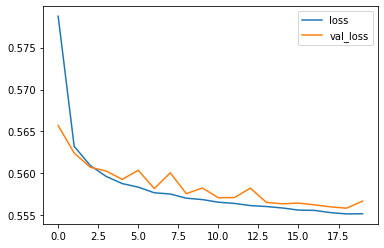

In [17]:
#plot the loss and accuracy
plt.plot(result_auto.history['loss'])
plt.plot(result_auto.history['val_loss'])
plt.legend(labels=['loss','val_loss'])

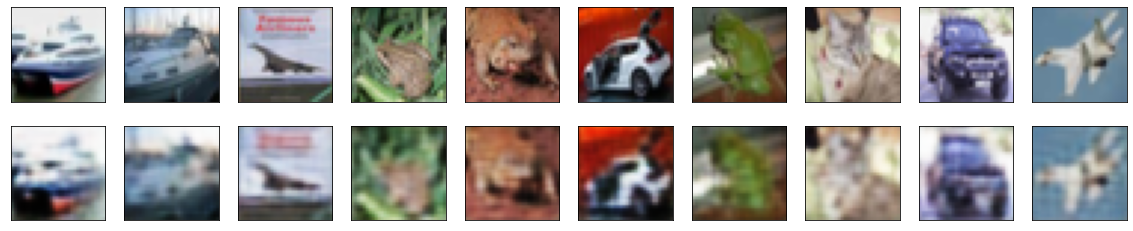

In [18]:
new = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

# original
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + n)#predict
    plt.imshow(new[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2 Image Classification

We’ll continue to use the CIFAR10 dataset and build a deep convolutional network for classification.
    

### 2.1 Deep CNN

Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performance on the training set and test set.

In [7]:
layers= tfk.layers

model = tfk.Sequential()

In [59]:

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3))) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

In [60]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ytrain_label = to_categorical(y_train)
ytest_label = to_categorical(y_test)

result_deep=model.fit(x_train,
                      ytrain_label,
                      steps_per_epoch=100,
                      epochs=10,batch_size=20,
                      validation_data=(x_test,ytest_label))

Epoch 1/10
100/100 [==============================] - 3s 27ms/step - loss: 2.2970 - accuracy: 0.1205 - val_loss: 2.2112 - val_accuracy: 0.1932
Epoch 2/10
100/100 [==============================] - 3s 26ms/step - loss: 2.1796 - accuracy: 0.1845 - val_loss: 2.1610 - val_accuracy: 0.1745
Epoch 3/10
100/100 [==============================] - 3s 25ms/step - loss: 2.0754 - accuracy: 0.2250 - val_loss: 1.9221 - val_accuracy: 0.3152
Epoch 4/10
100/100 [==============================] - 2s 25ms/step - loss: 1.9850 - accuracy: 0.2620 - val_loss: 1.8874 - val_accuracy: 0.3111
Epoch 5/10
100/100 [==============================] - 3s 27ms/step - loss: 1.9388 - accuracy: 0.2805 - val_loss: 1.7989 - val_accuracy: 0.3769
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 1.8749 - accuracy: 0.3015 - val_loss: 1.7783 - val_accuracy: 0.3520
Epoch 7/10
100/100 [==============================] - 3s 28ms/step - loss: 1.8238 - accuracy: 0.3335 - val_loss: 1.6827 - val_accuracy: 0.4078

1563/1563 [==============================] - 5s 3ms/step - loss: 1.6786 - accuracy: 0.3936
[1.674560546875, 0.3962000012397766]
[1.6786024570465088, 0.39362001419067383]


Text(0, 0.5, 'accuracy')

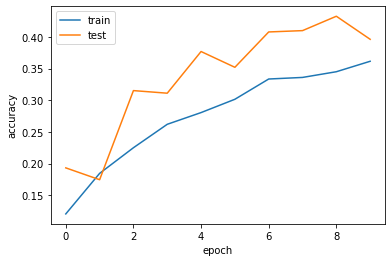

In [72]:
test_score = model.evaluate(x_test, ytest_label)
train_score = model.evaluate(x_train, ytrain_label)
print(test_score)
print(train_score)

plt.plot(result_deep.history['accuracy'])
plt.plot(result_deep.history['val_accuracy'])
plt.legend(labels=['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

The network I chose has  kernel_size = (3,3), strides = (1,1), padding = "valid". The test accuracy is better than training,which is around 0.39. The accuracy is approaching stable after epoch=6.

### 2.2 Transfer Learning

Repeat the same task, but this time utilize a pre-trained network for the major-
ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and test set.

In [8]:
from keras.applications import VGG16

In [10]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [12]:
model = tfk.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [16]:
conv_base.trainable = False

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_transfer=model.fit(x_train, ytrain_label, epochs=5, batch_size=64,validation_data=(x_test,ytest_label))

Epoch 1/5
782/782 [==============================] - 154s 196ms/step - loss: 1.6956 - accuracy: 0.4023 - val_loss: 1.3898 - val_accuracy: 0.5229
Epoch 2/5
782/782 [==============================] - 156s 199ms/step - loss: 1.4585 - accuracy: 0.4913 - val_loss: 1.3056 - val_accuracy: 0.5506
Epoch 3/5
782/782 [==============================] - 156s 199ms/step - loss: 1.3933 - accuracy: 0.5168 - val_loss: 1.2665 - val_accuracy: 0.5571
Epoch 4/5
782/782 [==============================] - 157s 201ms/step - loss: 1.3676 - accuracy: 0.5285 - val_loss: 1.2580 - val_accuracy: 0.5618
Epoch 5/5
782/782 [==============================] - 159s 204ms/step - loss: 1.3490 - accuracy: 0.5360 - val_loss: 1.2389 - val_accuracy: 0.5660


1563/1563 [==============================] - 137s 88ms/step - loss: 1.1751 - accuracy: 0.5936
[1.2389394044876099, 0.5659999847412109]
[1.1750640869140625, 0.5936200022697449]


Text(0, 0.5, 'accuracy')

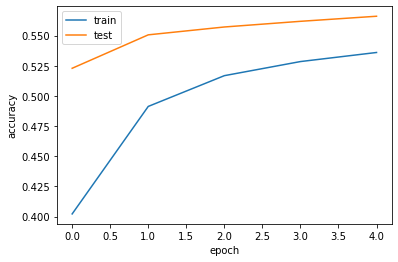

In [17]:
test_score = model.evaluate(x_test, ytest_label)
train_score = model.evaluate(x_train, ytrain_label)
print(test_score)
print(train_score)

plt.plot(model_transfer.history['accuracy'])
plt.plot(model_transfer.history['val_accuracy'])
plt.legend(labels=['train','test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

## 3 Text Classification 

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and dis- crete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language.

Background. In this problem, we will build models that read text segments (messages) and identify whether they are SPAM or HAM.

Wikipedia describes SPAM as “the use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.”

The term ‘HAM’ was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desired and isn’t considered SPAM.”
Dataset. The dataset consists of ∼ 5500 messages along with binary la- bels(SPAM or HAM) and is already preprocessed. So basically each sample is like [MESSAGE, LABEL].

In [20]:
text= pd.read_csv('SPAM_detection.csv')

In [21]:
text

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [22]:
from keras.preprocessing.text import Tokenizer
from string import printable
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import regularizers

In [52]:
tok = Tokenizer()

In [53]:
message=text['Message']

In [54]:
val=text['category_val']

In [55]:
tok.fit_on_texts(message)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( message, val, test_size=0.2, random_state=42)

In [57]:
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

In [59]:
xtrain_token=pad_sequences(tok.texts_to_sequences(x_train),padding='post')
xtest_token=pad_sequences(tok.texts_to_sequences(x_test),padding='post')

In [60]:
xtrain_t=xtrain_token[np.arange(xtrain_token.shape[0])]
xtest_t=xtest_token[np.arange(xtest_token.shape[0])]
ytrain_t=y_train[np.arange(y_train.shape[0])]
ytest_t=y_test[np.arange(y_test.shape[0])]

In [62]:
model=tfk.Sequential()

In [66]:
model.add(layers.Embedding(len(tok.word_index)+1, 16, input_length=256))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1,activation="sigmoid"))

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 189, 16)           144080    
_________________________________________________________________
lstm (LSTM)                  (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [72]:
result_text = model.fit(xtrain_t,
                        ytrain_t,
                        validation_data=(xtest_t,ytest_t),
                        epochs=20,steps_per_epoch=10,batch_size=64)

Epoch 1/20
10/10 [==============================] - 1s 76ms/step - loss: 0.3867 - accuracy: 0.8750 - val_loss: 0.3932 - val_accuracy: 0.8664
Epoch 2/20
10/10 [==============================] - 1s 73ms/step - loss: 0.3651 - accuracy: 0.8844 - val_loss: 0.3956 - val_accuracy: 0.8664
Epoch 3/20
10/10 [==============================] - 1s 74ms/step - loss: 0.3707 - accuracy: 0.8797 - val_loss: 0.3936 - val_accuracy: 0.8664
Epoch 4/20
10/10 [==============================] - 1s 72ms/step - loss: 0.3892 - accuracy: 0.8687 - val_loss: 0.3932 - val_accuracy: 0.8664
Epoch 5/20
10/10 [==============================] - 1s 73ms/step - loss: 0.4654 - accuracy: 0.8344 - val_loss: 0.3968 - val_accuracy: 0.8664
Epoch 6/20
10/10 [==============================] - 1s 73ms/step - loss: 0.4187 - accuracy: 0.8594 - val_loss: 0.3945 - val_accuracy: 0.8664
Epoch 7/20
10/10 [==============================] - 1s 72ms/step - loss: 0.4159 - accuracy: 0.8590 - val_loss: 0.3933 - val_accuracy: 0.8664
Epoch 8/20
10

In [73]:
test_score = model.evaluate(xtest_t, ytest_t)
train_score = model.evaluate(xtrain_t, ytrain_t)
print(test_score)
print(train_score)

140/140 [==============================] - 4s 25ms/step - loss: 0.3969 - accuracy: 0.8658
[0.39600738883018494, 0.8663676977157593]
[0.396899551153183, 0.8658290505409241]
